### Determine the optimal K number

* This notebook determines the optimal number of K-Means algorithm using Average silhouette method
* Three data processing approaches: 
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach I. 514 features were pre-selected out of the 1063 features. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach II. 514 features were selected out of the 1063 features. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach III. Drop all the categorical values and impute the numerical values with means, use PCA to reduce the original 1063 dimensions.  the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data.
* All three approaches show consistent results of optimal K of 8.

Reference:  http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline

#### Approach I. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.

In [8]:
df = pd.read_csv('/home/capsops/mandy/lowrank_rep.csv.gz')

In [9]:
X = StandardScaler().fit_transform(df)

In [12]:
import time
start = time.time()

# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
#     # Create a subplot with 1 row and 2 columns
#     fig, ax = plt.subplots(1, 1)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 
#     ax.set_xlim([-1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.spectral(float(i) / n_clusters)
#         ax.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax.set_title("The silhouette plot for the various clusters.")
#     ax.set_xlabel("The silhouette coefficient values")
#     ax.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#     plt.show()
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

For n_clusters = 2 The average silhouette_score is : 0.072717654796498
For n_clusters = 3 The average silhouette_score is : 0.04089267134109773
For n_clusters = 4 The average silhouette_score is : 0.04670453757292139
For n_clusters = 5 The average silhouette_score is : 0.05654648359745715
For n_clusters = 6 The average silhouette_score is : 0.05985700409839573
For n_clusters = 7 The average silhouette_score is : 0.05695582485318368
For n_clusters = 8 The average silhouette_score is : 0.05848739013857629
For n_clusters = 9 The average silhouette_score is : 0.058007978360157274
For n_clusters = 10 The average silhouette_score is : 0.06293691154720871
For n_clusters = 11 The average silhouette_score is : 0.05311023349264474
For n_clusters = 12 The average silhouette_score is : 0.04936113128260946
For n_clusters = 13 The average silhouette_score is : 0.05503317247352436
03:23:21.53


In [2]:
score = [0.072717654796498,0.04089267134109773, 0.04670453757292139, 0.05654648359745715,0.05985700409839573,0.05695582485318368,0.05848739013857629,0.058007978360157274,0.06293691154720871,0.05311023349264474,0.04936113128260946,0.05503317247352436]
k_range = range(2,14)

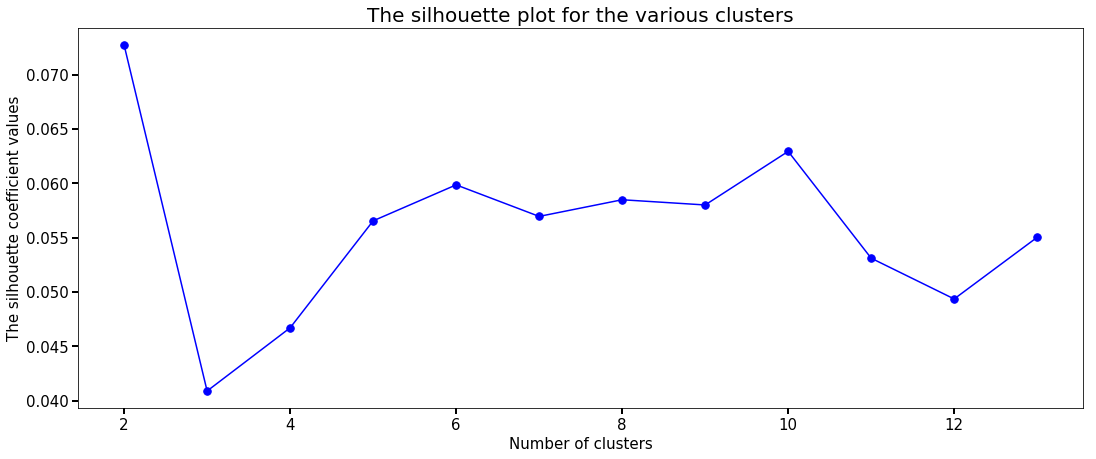

In [3]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach II. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data

In [4]:
# Use a smaller data set to save time
df1 = pd.read_csv('PHBsample14_sss.csv', low_memory=False)
df2 = pd.read_csv('PHBsample15_sss.csv', low_memory=False)
df3 = pd.read_csv('PHBsample16_sss.csv', low_memory=False)
# drop the column resulted from sampling of the original data set
df1.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
selected_variable = pd.read_csv('selectedVariables.csv')
selected_variable.drop('Unnamed: 0', axis=1, inplace=True)
df1_1 = df1[df1.columns.intersection(selected_variable.columns)]
df2_1 = df2[df2.columns.intersection(selected_variable.columns)]
df3_1 = df3[df3.columns.intersection(selected_variable.columns)]

In [7]:
# Drop all the categoricald data for now.
df1_2 = df1_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df1_3 = df1_2.fillna(df1_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df1_3)

For n_clusters = 2 The average silhouette_score is : 0.04902706301226173


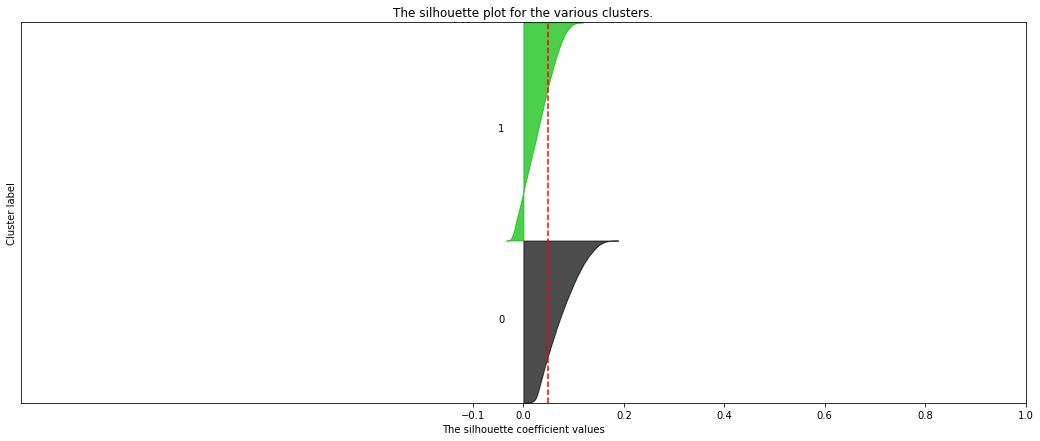

For n_clusters = 3 The average silhouette_score is : 0.037954594441643515


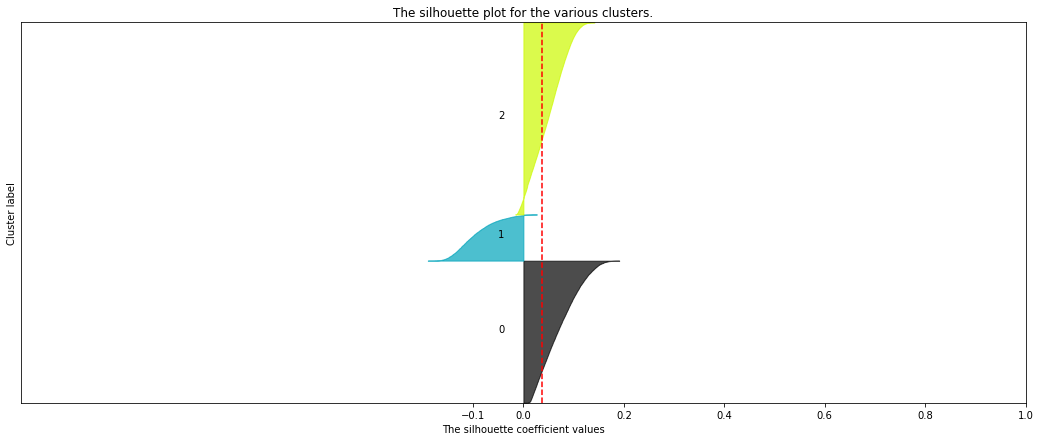

For n_clusters = 4 The average silhouette_score is : 0.015582511703659416


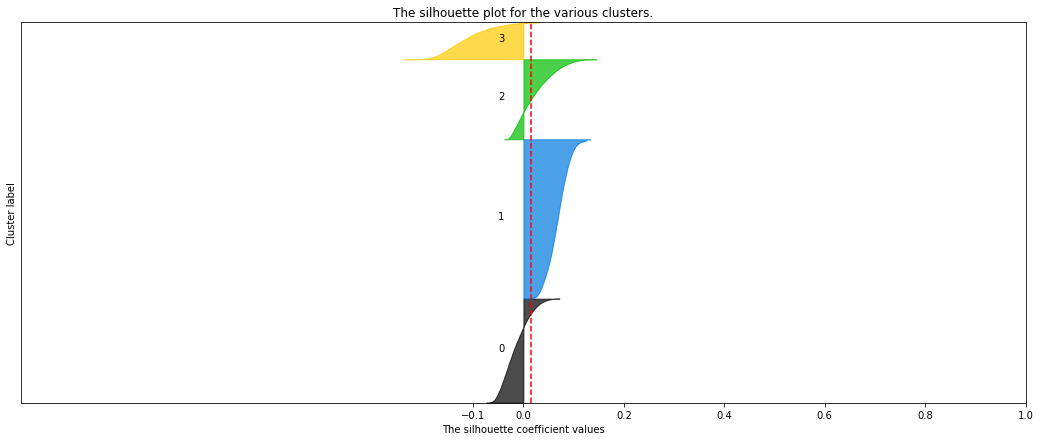

For n_clusters = 5 The average silhouette_score is : 0.014798856030805564


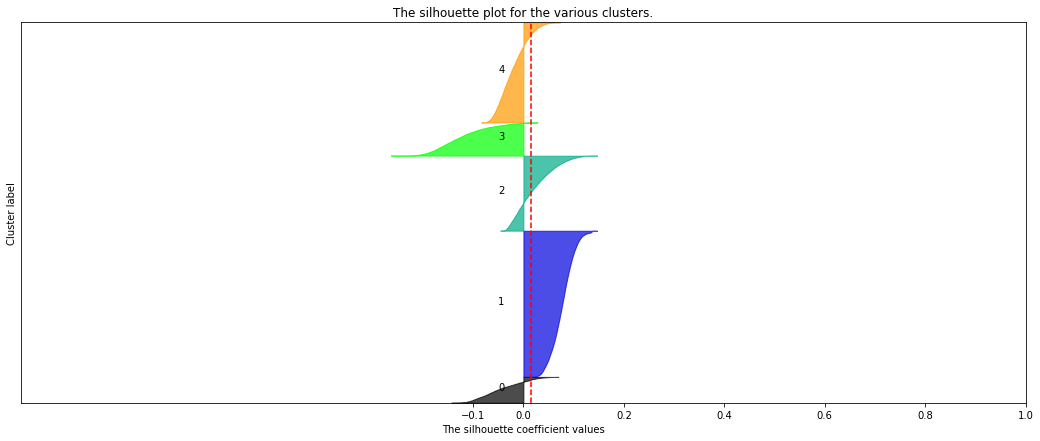

For n_clusters = 6 The average silhouette_score is : 0.010967829850565283


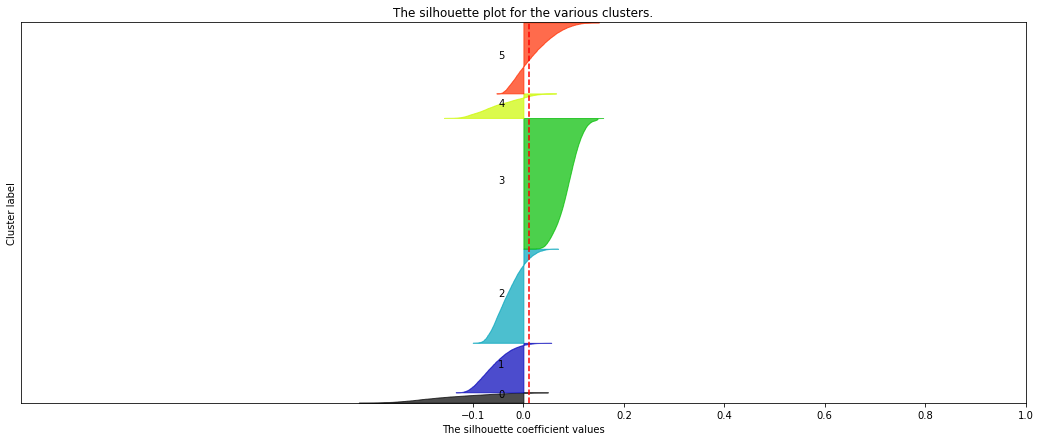

For n_clusters = 7 The average silhouette_score is : 0.005448385330352533


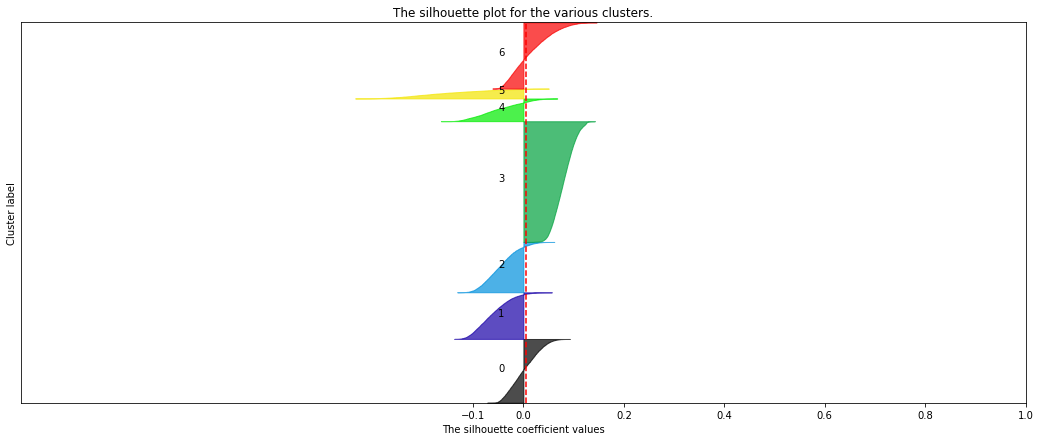

For n_clusters = 8 The average silhouette_score is : 0.006114136826697029


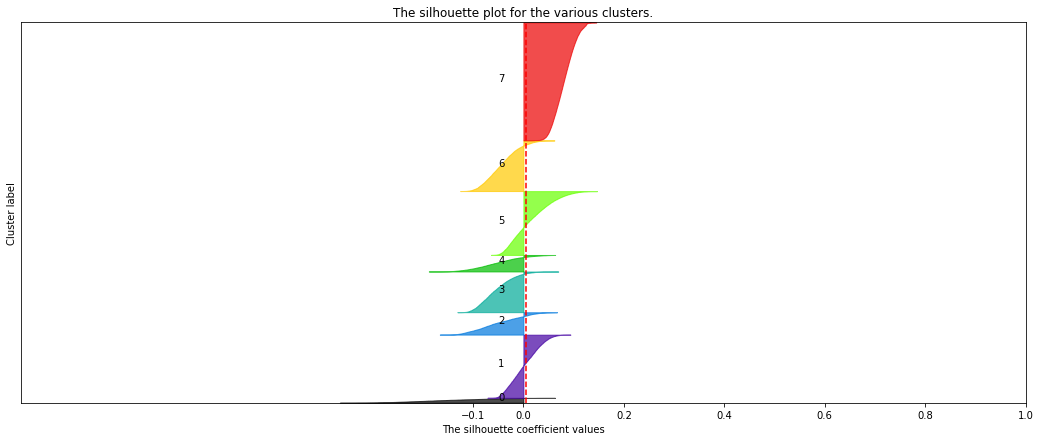

For n_clusters = 9 The average silhouette_score is : 0.004995598854874287


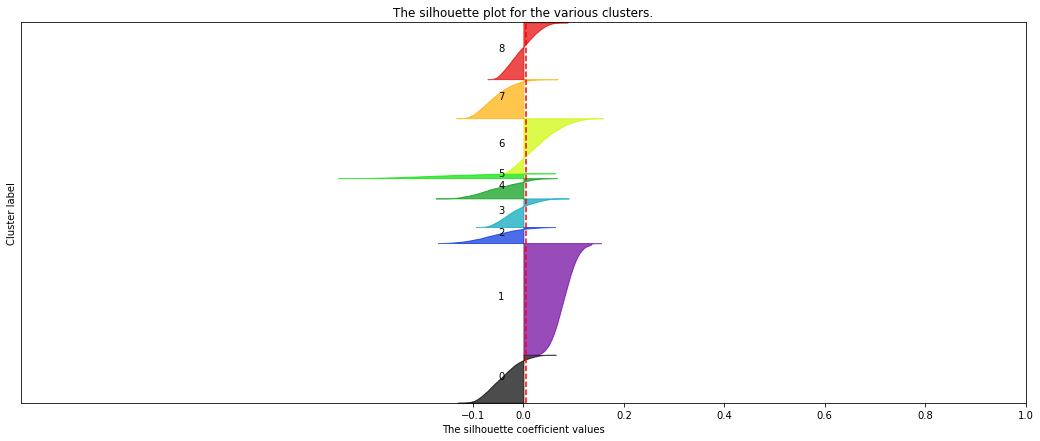

For n_clusters = 10 The average silhouette_score is : -0.0073324356762972985


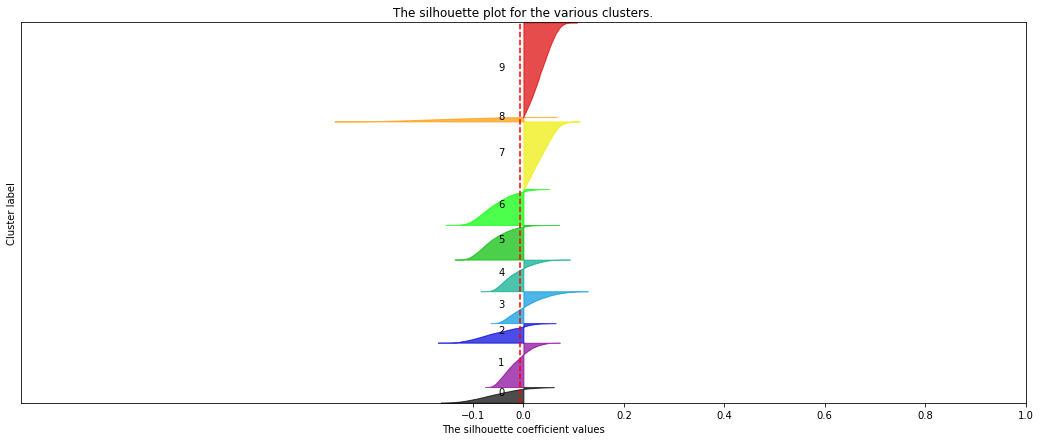

For n_clusters = 11 The average silhouette_score is : -0.0048675792059834026


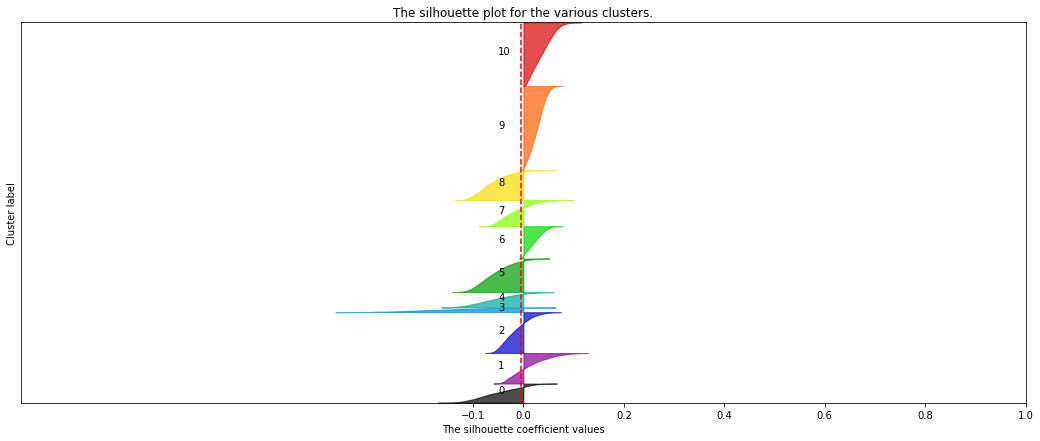

For n_clusters = 12 The average silhouette_score is : -0.009000557250107254


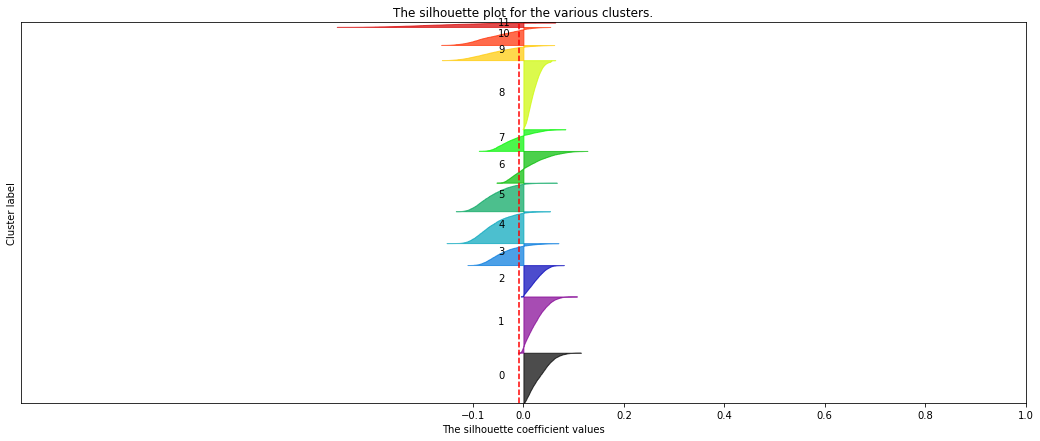

For n_clusters = 13 The average silhouette_score is : -0.00750432512991938


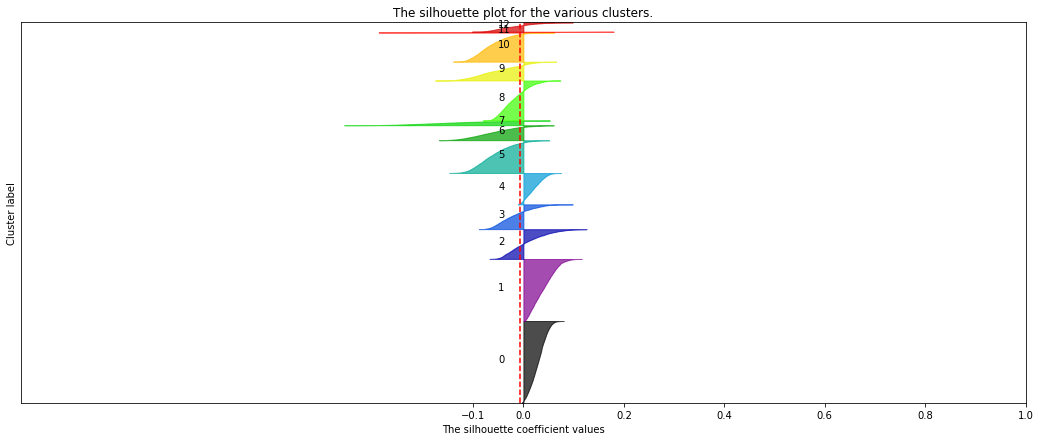

In [11]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

##### Subsample 1

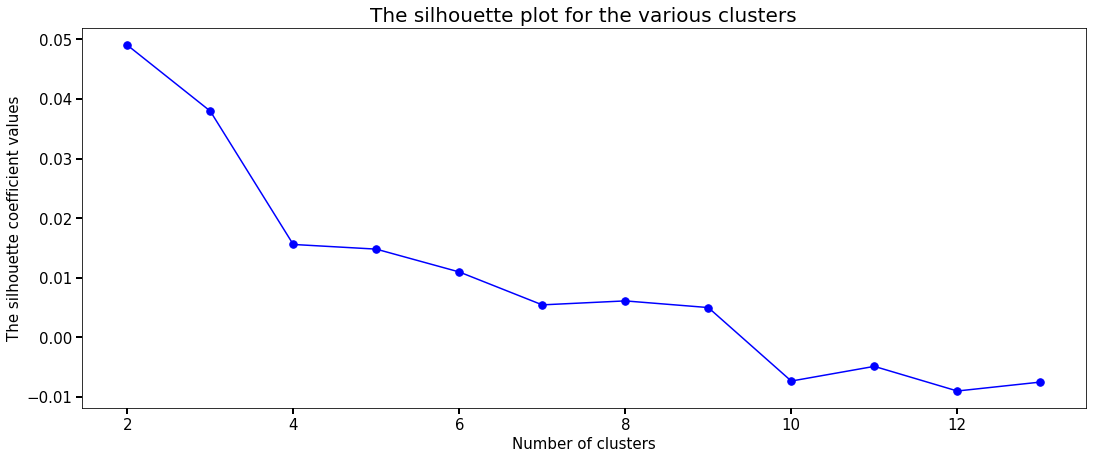

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [13]:
# Drop all the categoricald data for now.
df2_2 = df2_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df2_3 = df2_2.fillna(df2_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df2_3)

In [15]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05032008559666883
For n_clusters = 3 The average silhouette_score is : 0.037871704860788405
For n_clusters = 4 The average silhouette_score is : 0.018774756977043134
For n_clusters = 5 The average silhouette_score is : 0.014329174210957106
For n_clusters = 6 The average silhouette_score is : 0.009446515722551336
For n_clusters = 7 The average silhouette_score is : 0.008960529486810476
For n_clusters = 8 The average silhouette_score is : 0.006868475700101765
For n_clusters = 9 The average silhouette_score is : 0.010102085270494039
For n_clusters = 10 The average silhouette_score is : -0.008708038664290447
For n_clusters = 11 The average silhouette_score is : -0.005032711120545471
For n_clusters = 12 The average silhouette_score is : -0.008481176894724995
For n_clusters = 13 The average silhouette_score is : -0.010803184933287795


##### Subsample 2

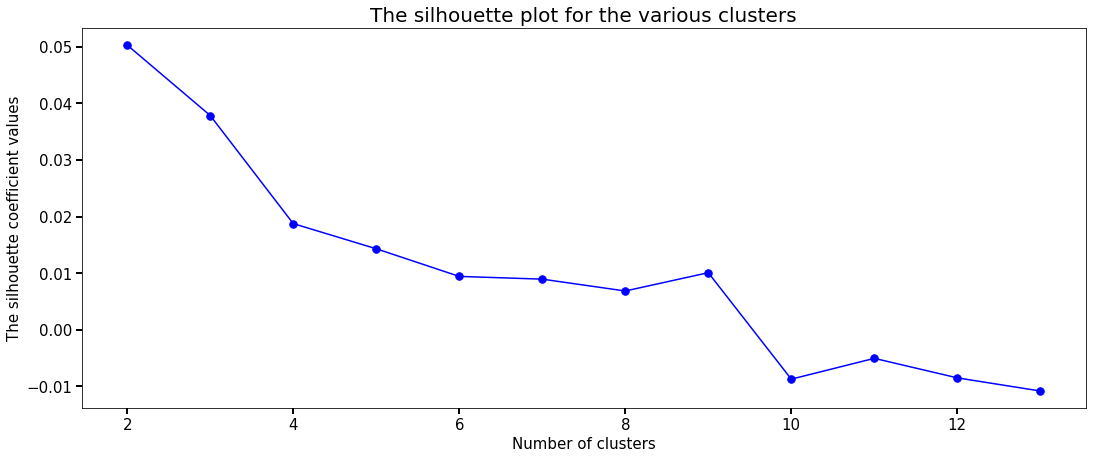

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [17]:
# Drop all the categoricald data for now.
df3_2 = df3_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df3_3 = df3_2.fillna(df3_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df3_3)

In [18]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05147103840196503
For n_clusters = 3 The average silhouette_score is : 0.040177921021609636
For n_clusters = 4 The average silhouette_score is : 0.017762856044127782
For n_clusters = 5 The average silhouette_score is : 0.015742544356484048
For n_clusters = 6 The average silhouette_score is : 0.012742600998323382
For n_clusters = 7 The average silhouette_score is : 0.010572318141552212
For n_clusters = 8 The average silhouette_score is : 0.009349376126186791
For n_clusters = 9 The average silhouette_score is : -0.004335649516901847
For n_clusters = 10 The average silhouette_score is : -0.007430112273391814
For n_clusters = 11 The average silhouette_score is : -0.008083663885203842
For n_clusters = 12 The average silhouette_score is : -0.0059598682030808535
For n_clusters = 13 The average silhouette_score is : -0.006990206033060425


##### Subsample 3

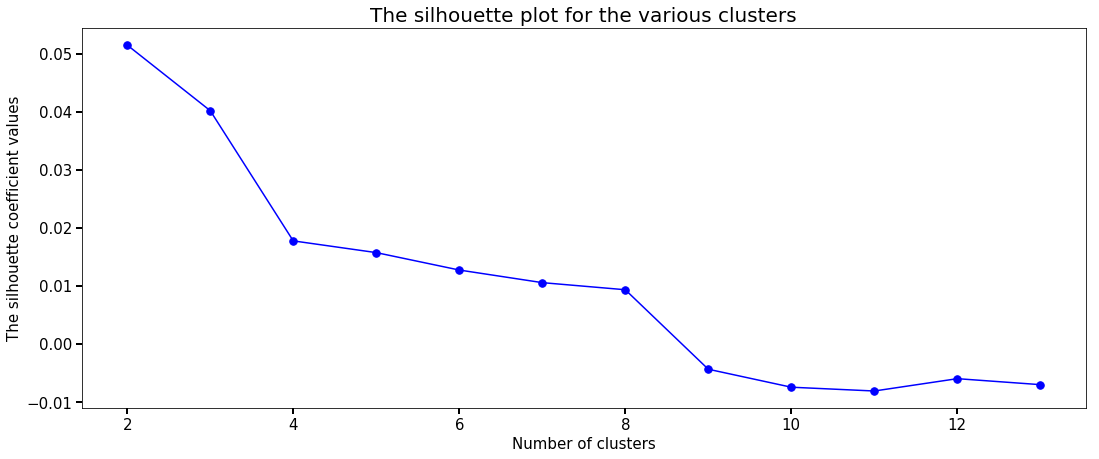

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach III. Use PCA to reduce the original 1063 dimensions. Drop all the categorical values and impute the numerical values with means, the method will be applied on a ramdonly generated subsamples (1.25%) of the original size data.

##### Subsample 1

In [2]:
df = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [3]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())

In [4]:
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 2 The average silhouette_score is : 0.5932609193997849


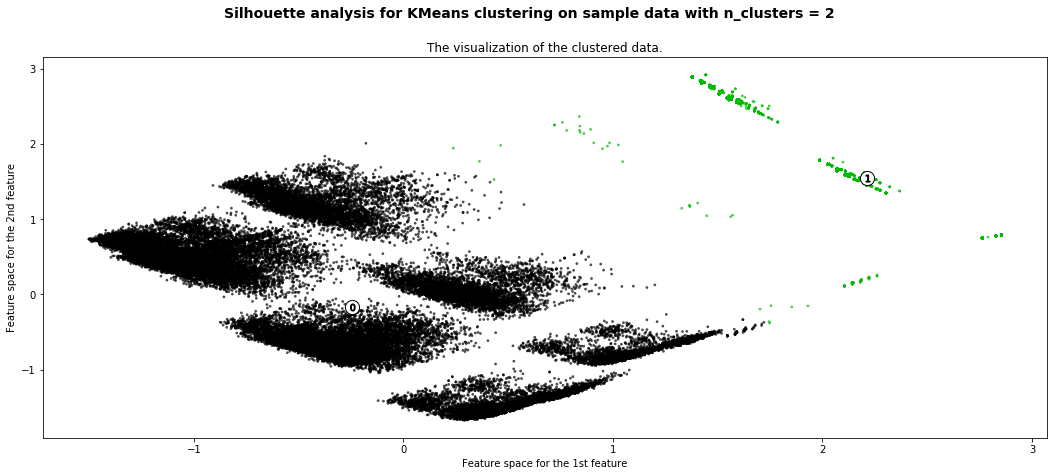

For n_clusters = 3 The average silhouette_score is : 0.5690789853851366


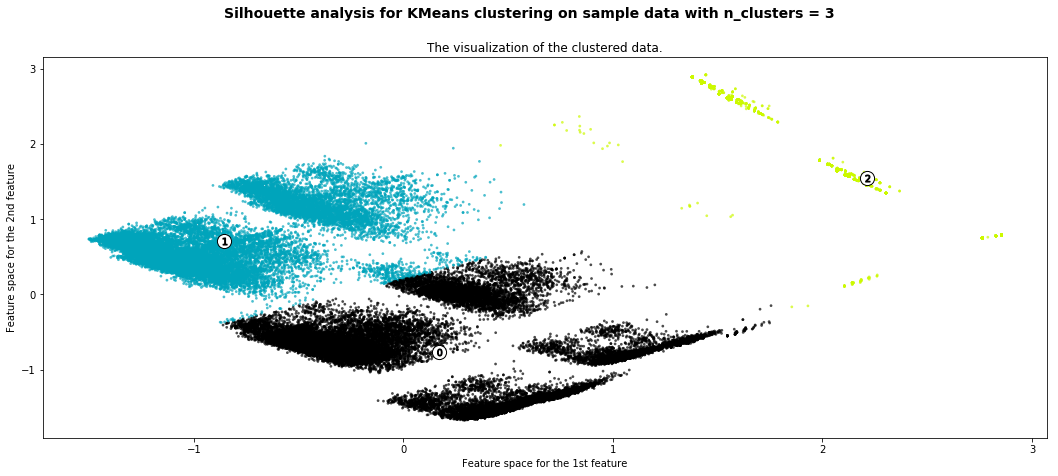

For n_clusters = 4 The average silhouette_score is : 0.5686084673351883


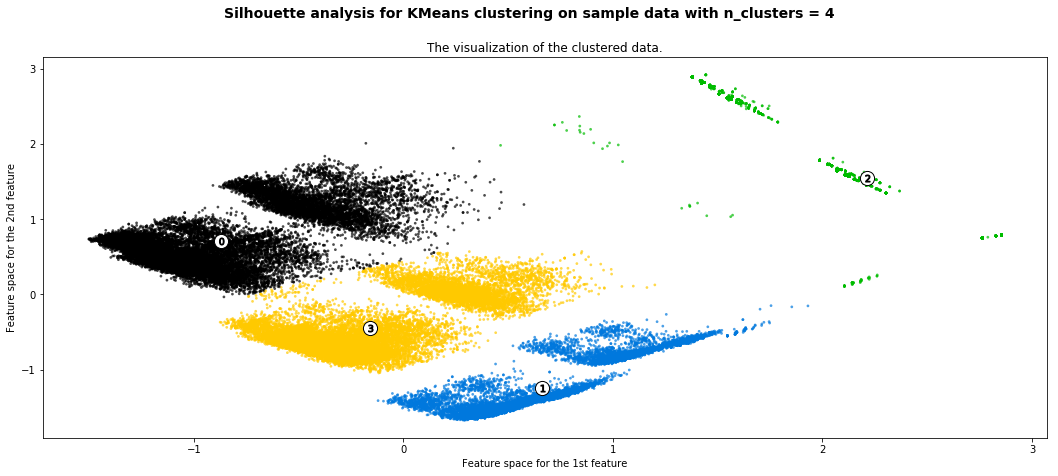

For n_clusters = 5 The average silhouette_score is : 0.5698373276444733


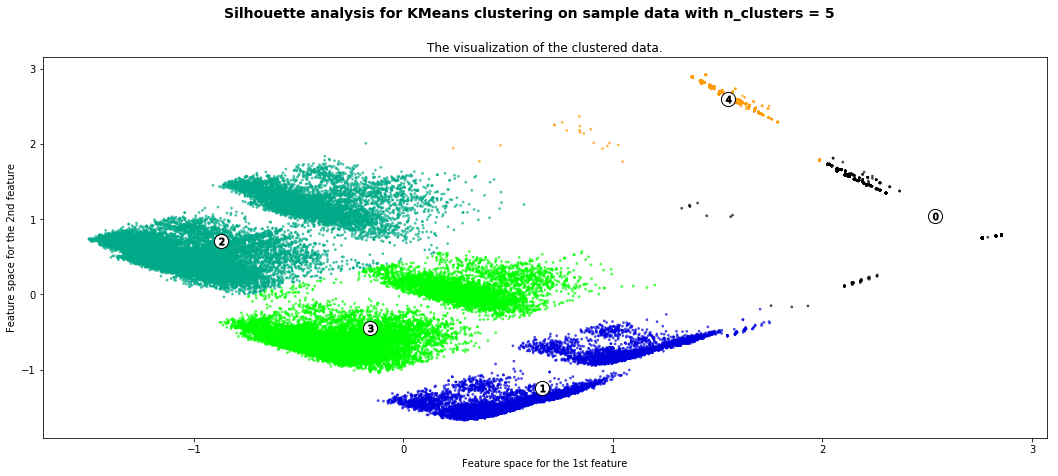

For n_clusters = 6 The average silhouette_score is : 0.5910140062097984


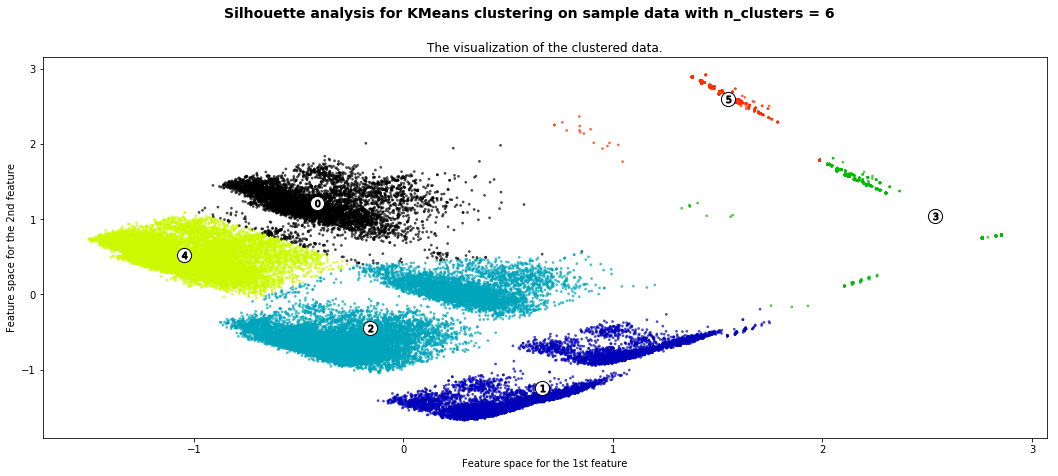

For n_clusters = 7 The average silhouette_score is : 0.6239143277888208


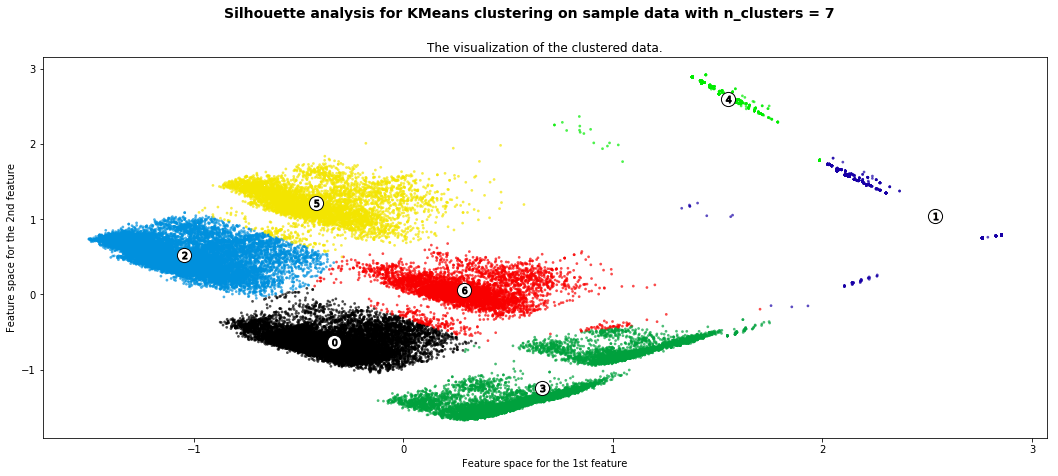

For n_clusters = 8 The average silhouette_score is : 0.6554332126939415


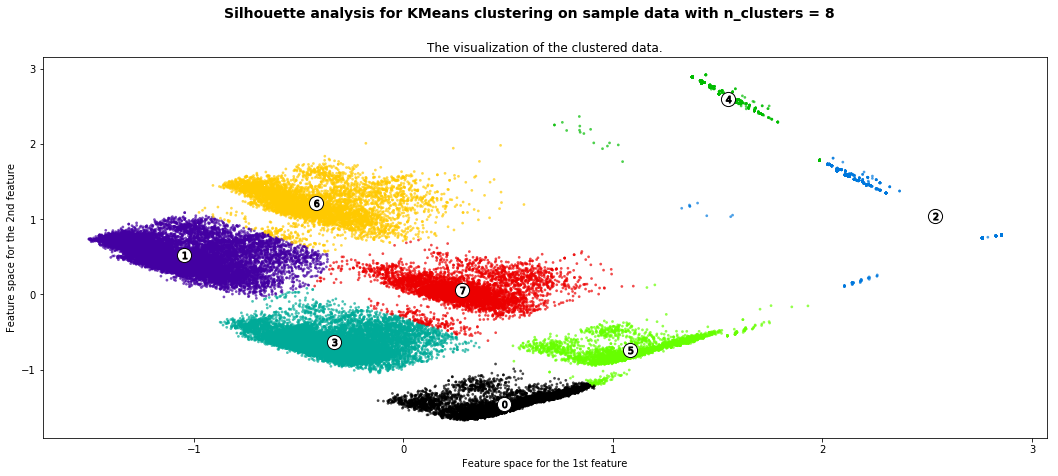

For n_clusters = 9 The average silhouette_score is : 0.6775522881971895


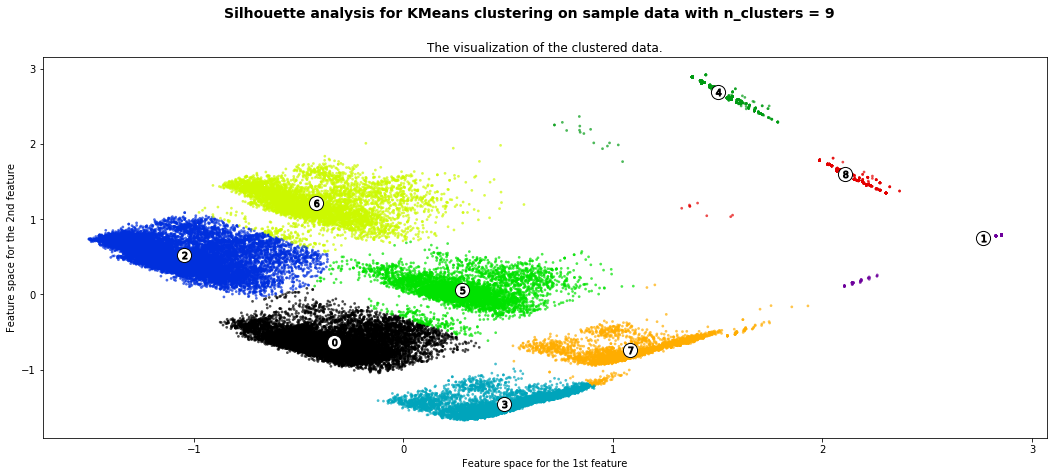

For n_clusters = 10 The average silhouette_score is : 0.6158894758851108


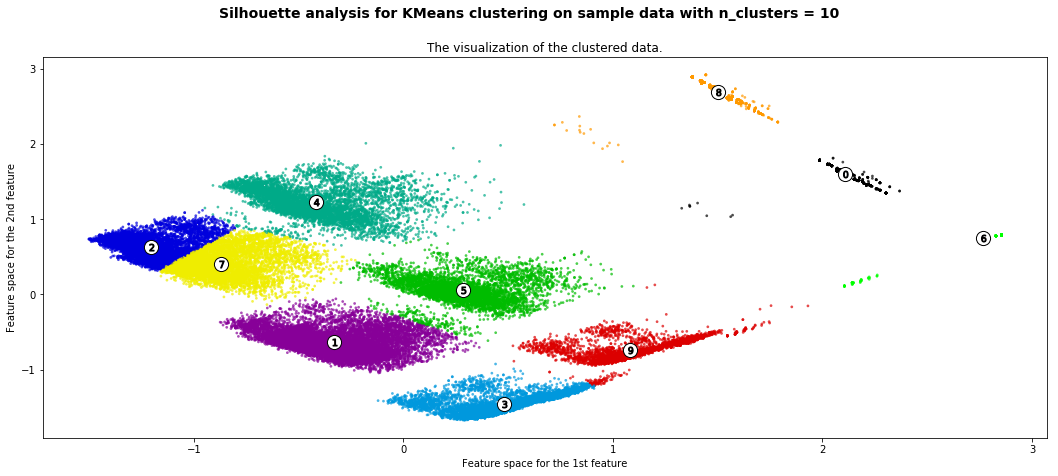

For n_clusters = 11 The average silhouette_score is : 0.5448688208618224


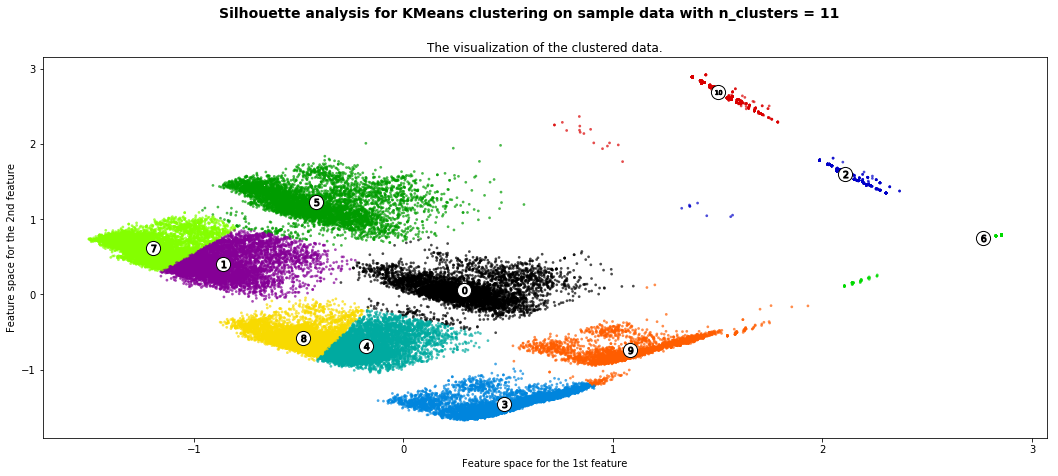

For n_clusters = 12 The average silhouette_score is : 0.5079606024367648


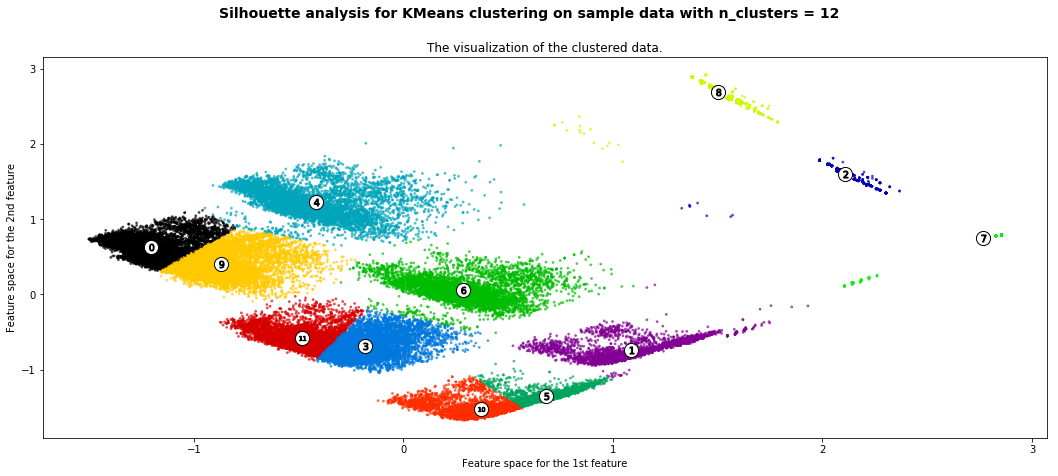

For n_clusters = 13 The average silhouette_score is : 0.49235517047526944


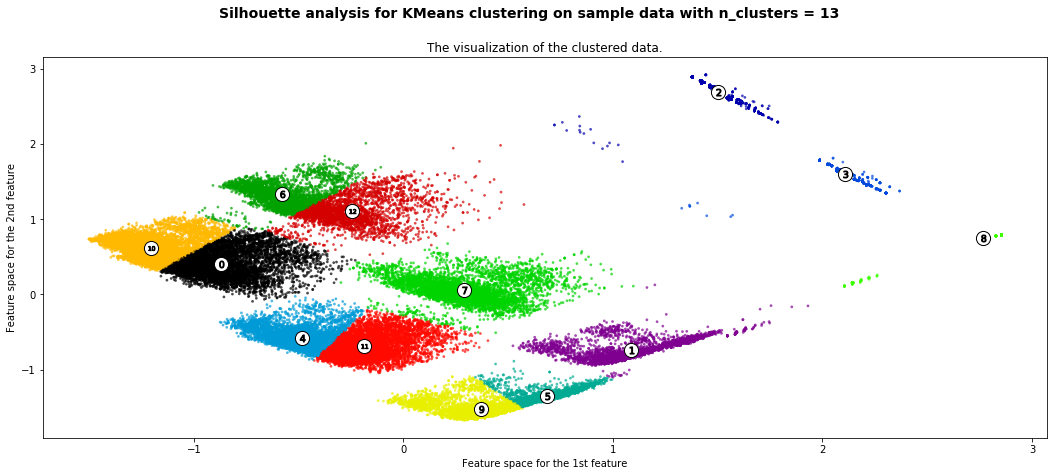

In [5]:
# Determine your k range

score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

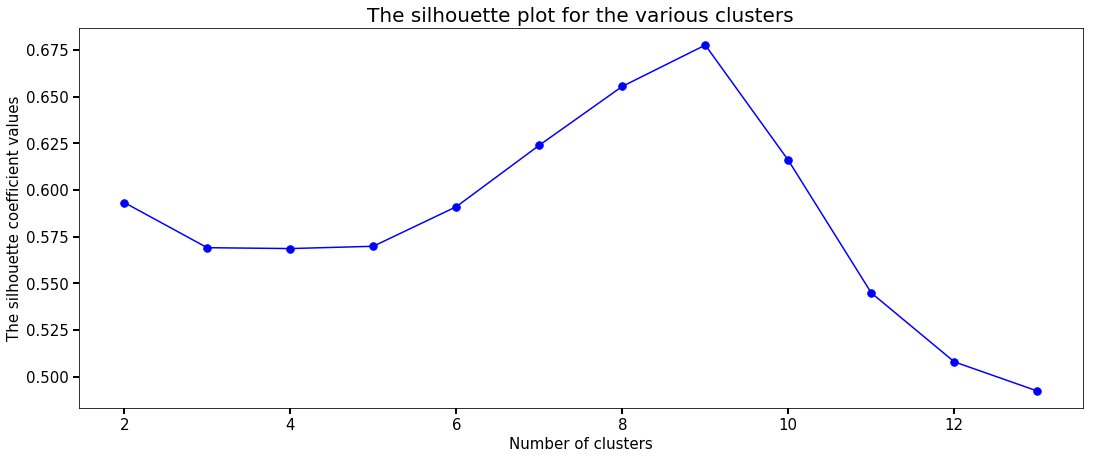

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

##### Subsample 2

In [7]:
df = pd.read_csv('PHBsample15_sss.csv', low_memory=False)

In [8]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 2 The average silhouette_score is : 0.448477952829016


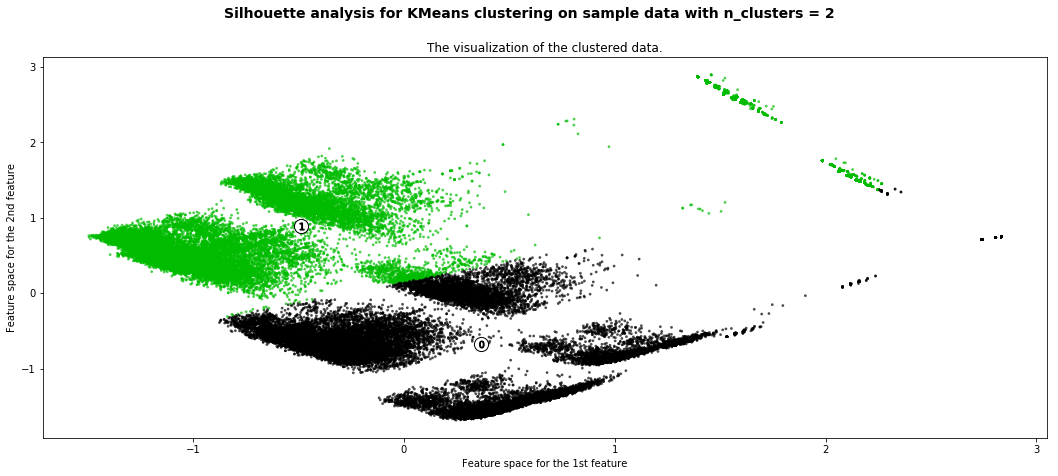

For n_clusters = 3 The average silhouette_score is : 0.5663577475463809


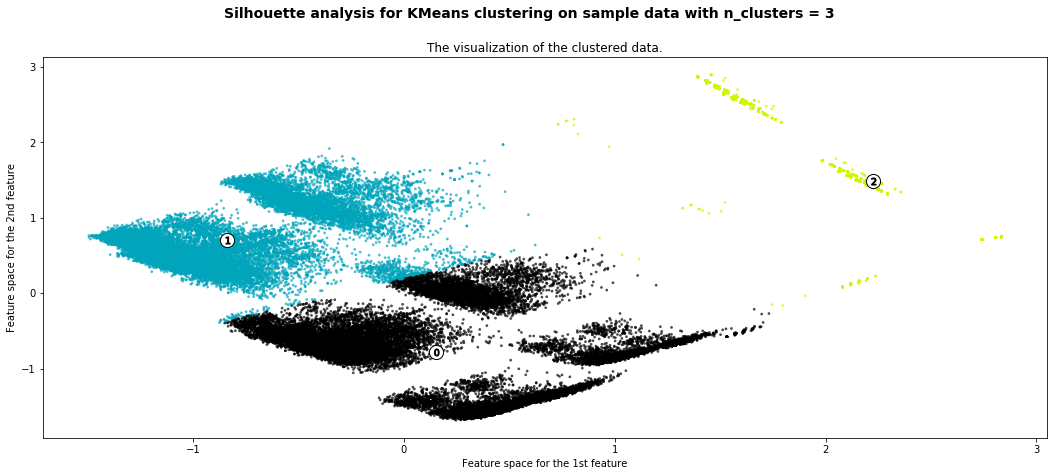

For n_clusters = 4 The average silhouette_score is : 0.5633242750350116


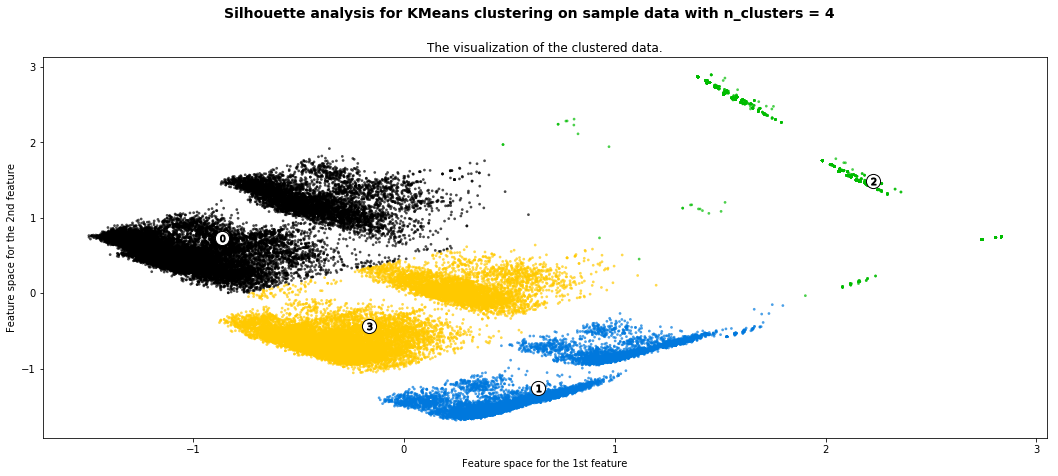

For n_clusters = 5 The average silhouette_score is : 0.5644874905075872


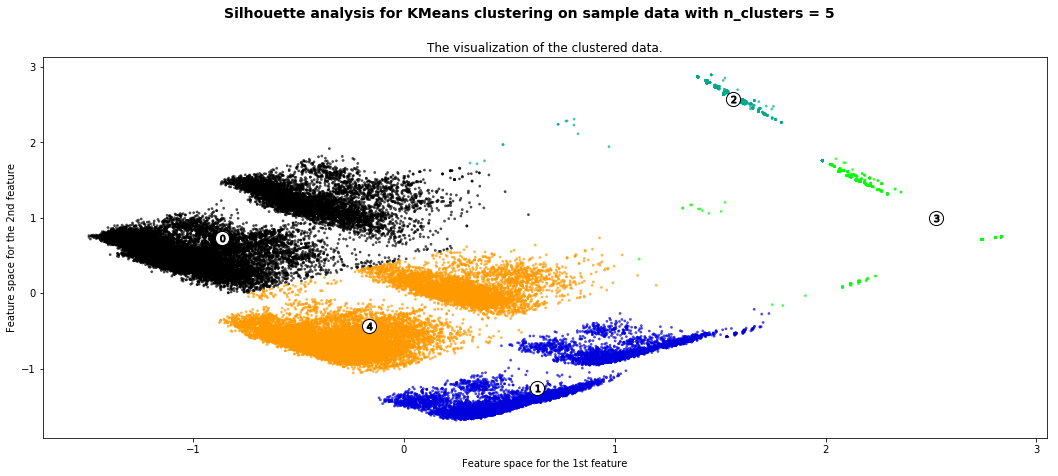

For n_clusters = 6 The average silhouette_score is : 0.5744895943381386


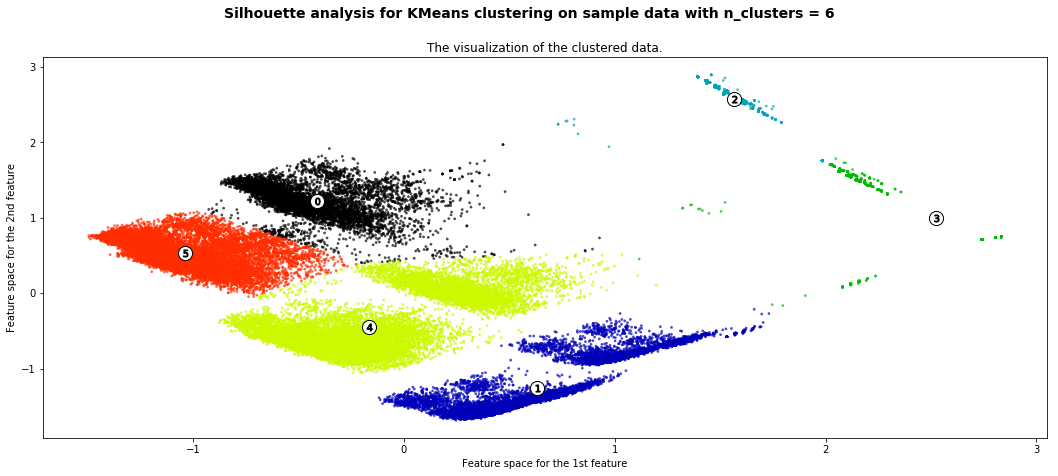

For n_clusters = 7 The average silhouette_score is : 0.6268584845078629


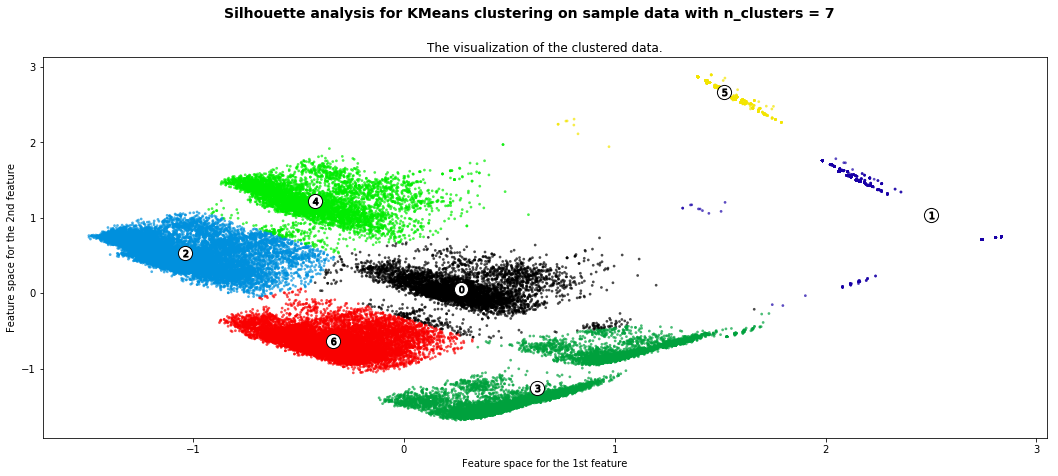

For n_clusters = 8 The average silhouette_score is : 0.6517728924310044


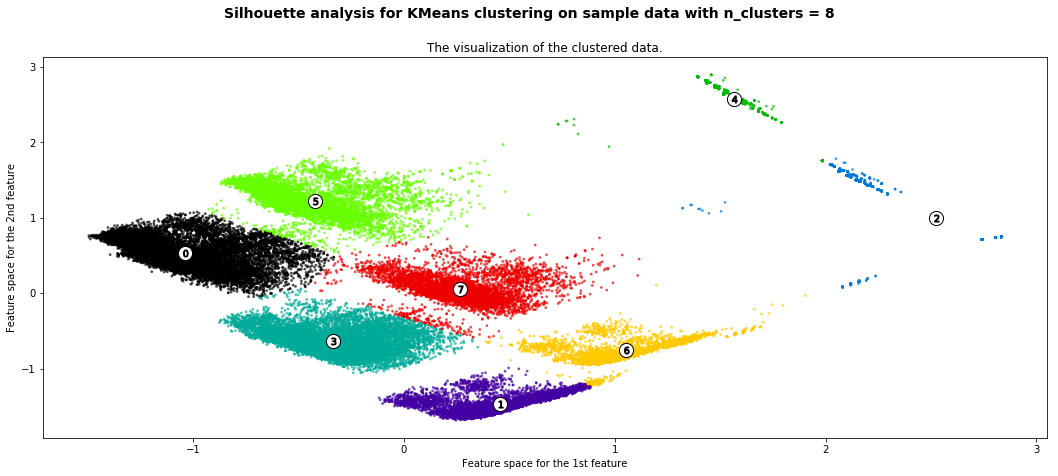

For n_clusters = 9 The average silhouette_score is : 0.6758262023036459


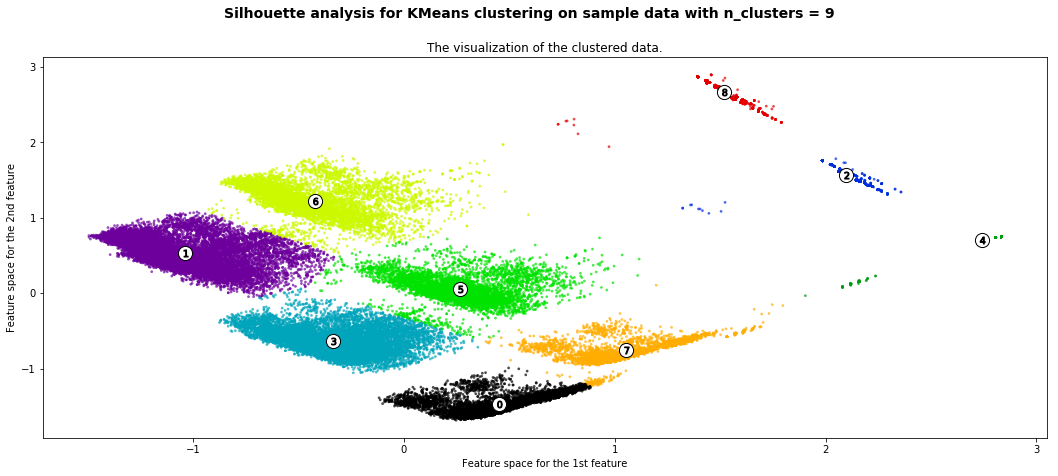

For n_clusters = 10 The average silhouette_score is : 0.6219923116173357


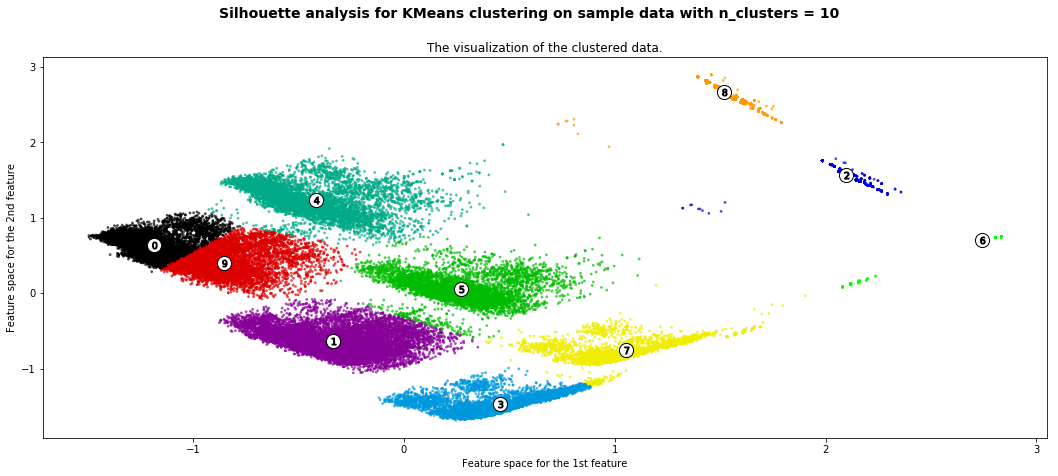

For n_clusters = 11 The average silhouette_score is : 0.5428072002887083


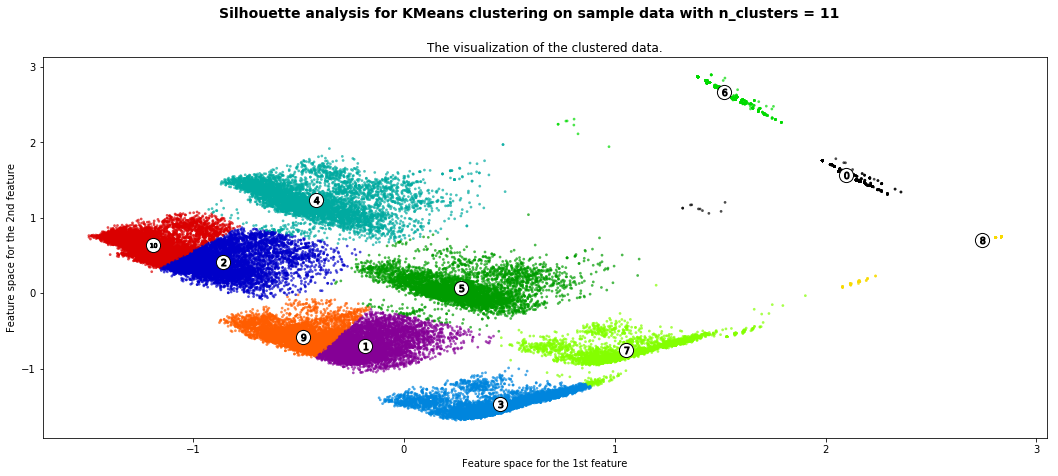

For n_clusters = 12 The average silhouette_score is : 0.5040884859245449


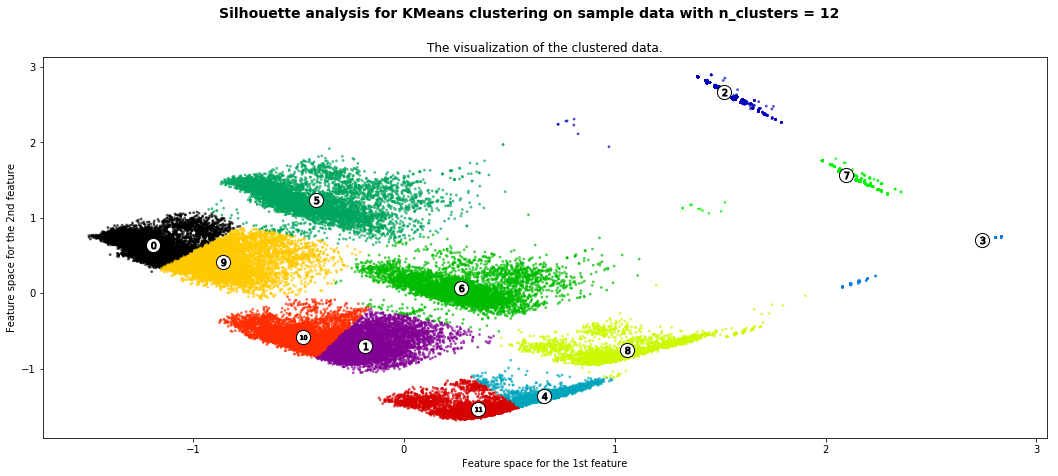

For n_clusters = 13 The average silhouette_score is : 0.520205954390308


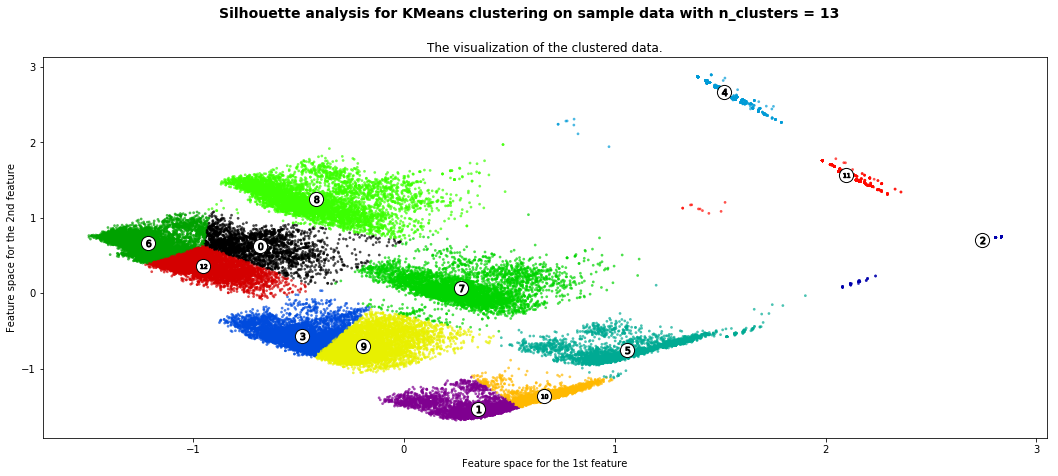

In [9]:
# Determine your k range

score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

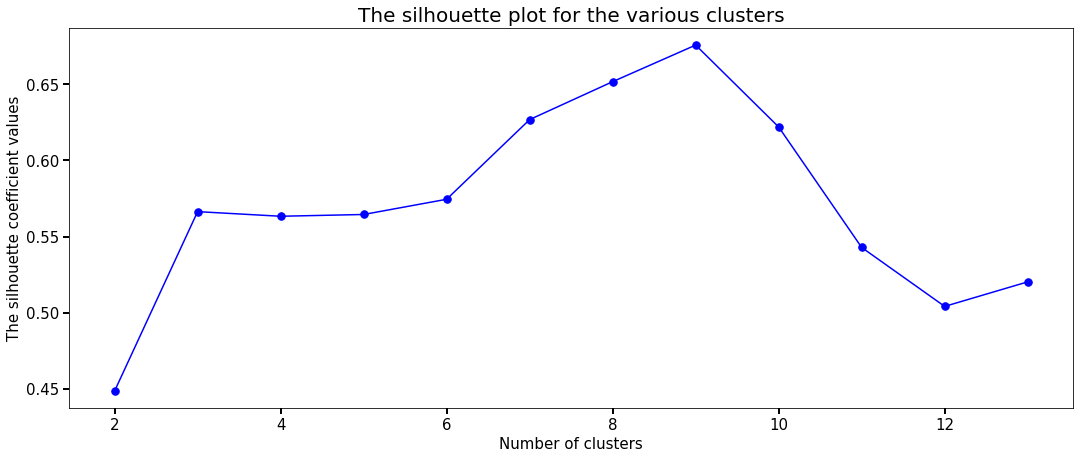

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

##### Subsample 3

In [11]:
df = pd.read_csv('PHBsample16_sss.csv', low_memory=False)

In [12]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 2 The average silhouette_score is : 0.5869908961441394


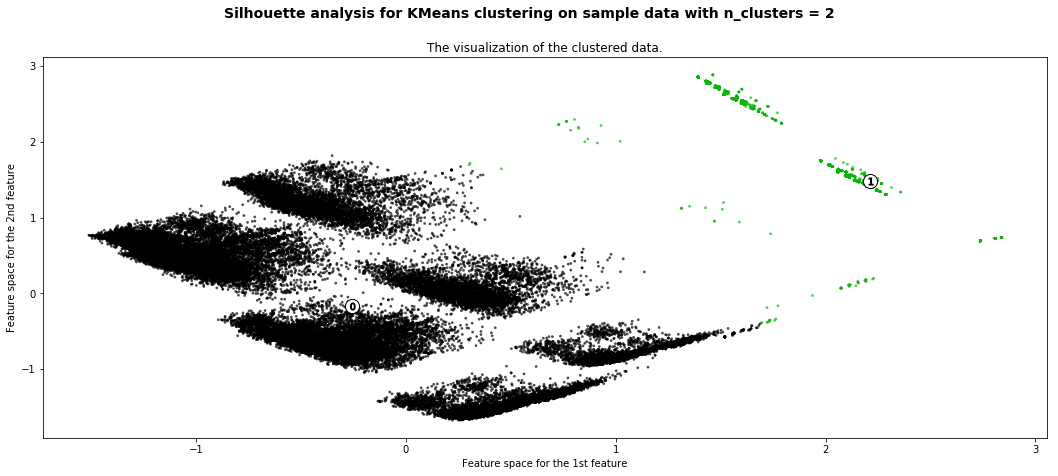

For n_clusters = 3 The average silhouette_score is : 0.5662866528143634


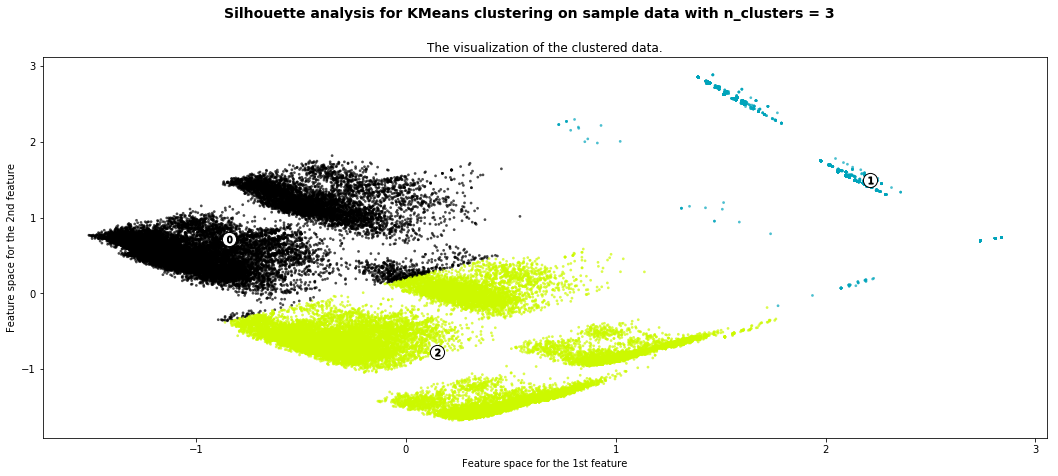

For n_clusters = 4 The average silhouette_score is : 0.565733647799988


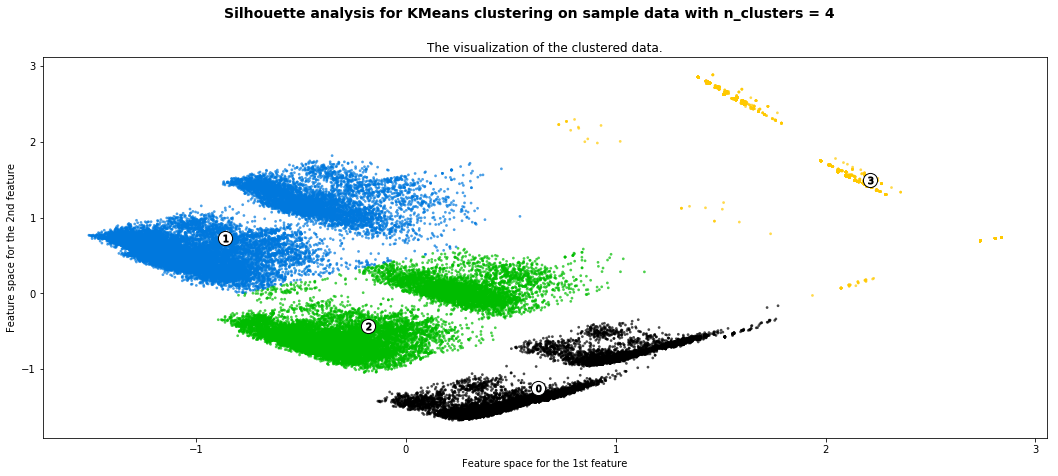

For n_clusters = 5 The average silhouette_score is : 0.5712416370493651


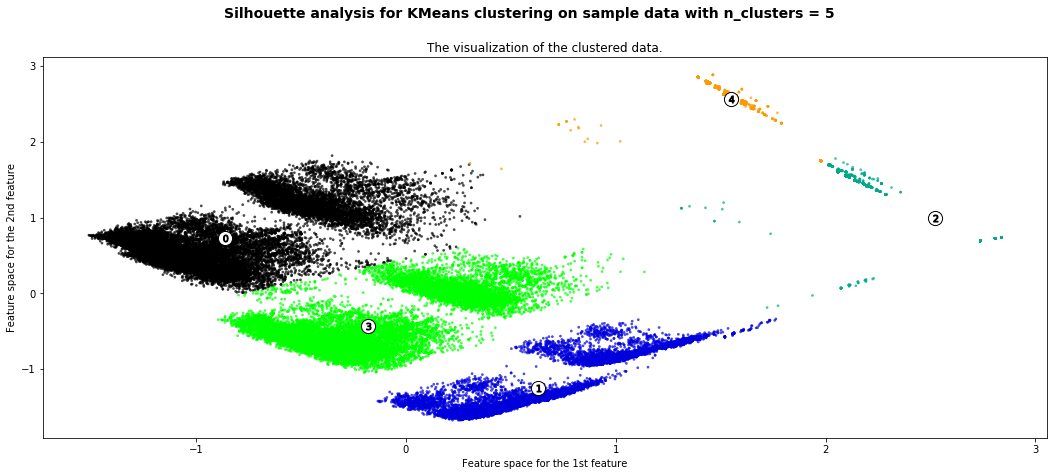

For n_clusters = 6 The average silhouette_score is : 0.5883882577489612


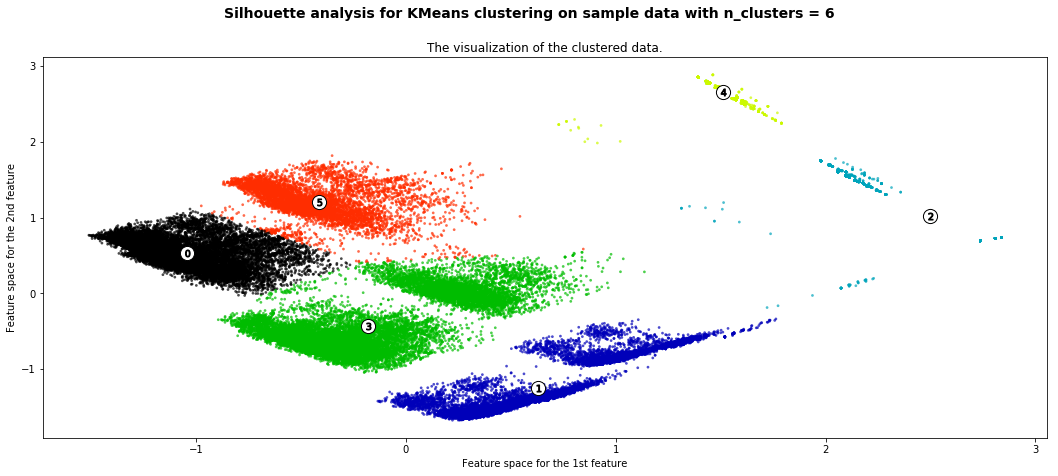

For n_clusters = 7 The average silhouette_score is : 0.6207042656677625


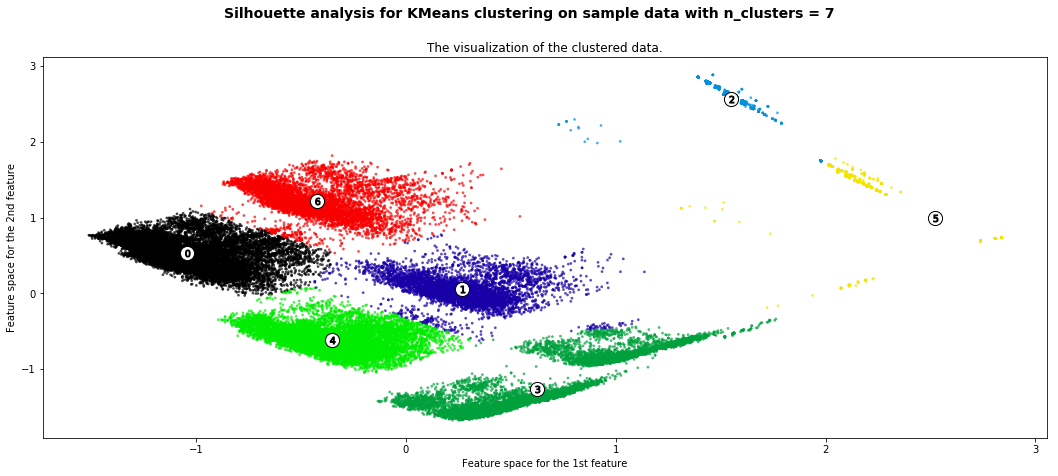

For n_clusters = 8 The average silhouette_score is : 0.6572695787863447


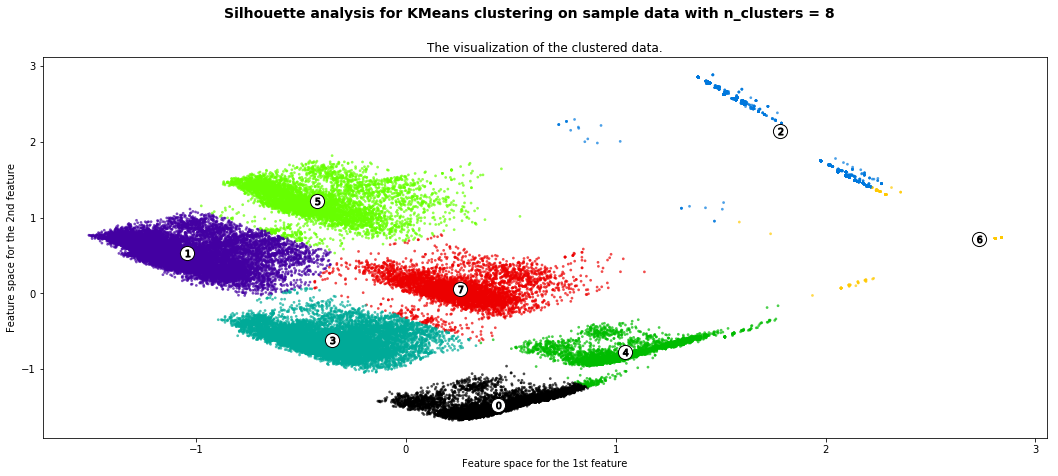

For n_clusters = 9 The average silhouette_score is : 0.6764711961072879


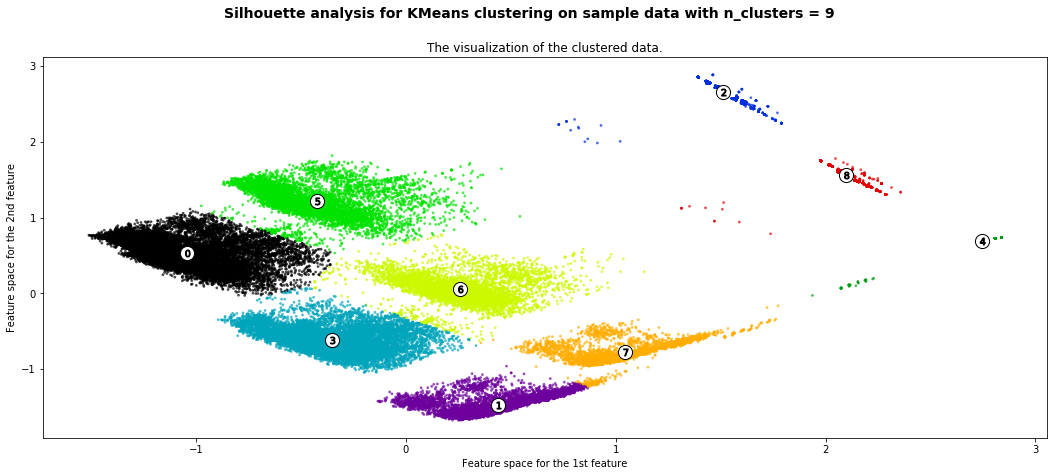

For n_clusters = 10 The average silhouette_score is : 0.6166211385986864


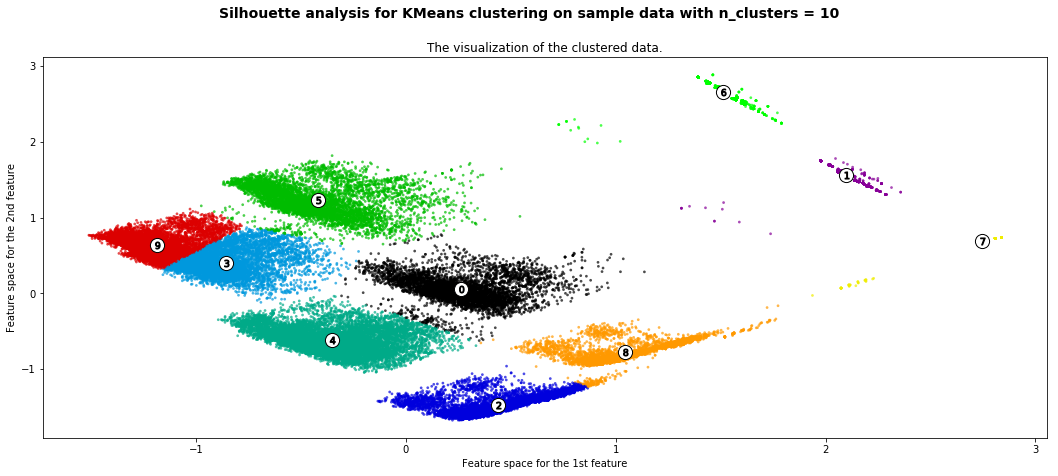

For n_clusters = 11 The average silhouette_score is : 0.5482452272879212


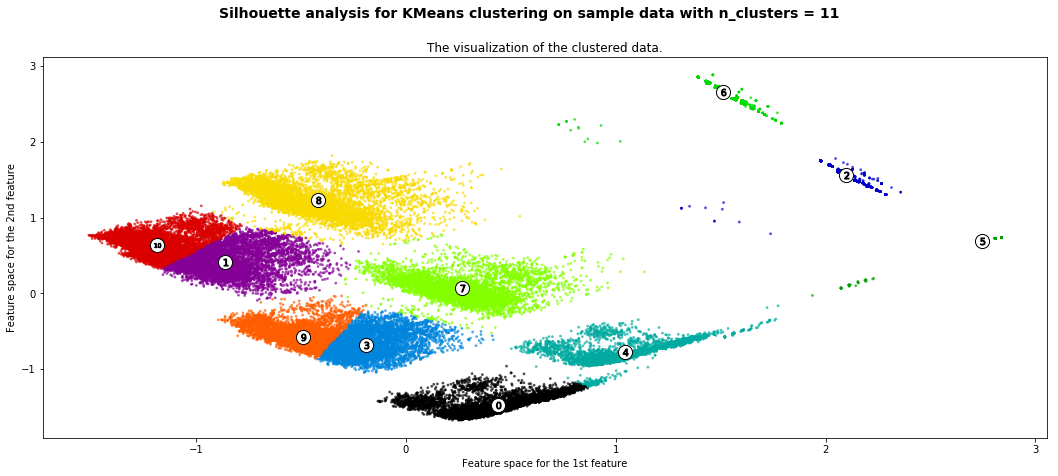

For n_clusters = 12 The average silhouette_score is : 0.5117807893674963


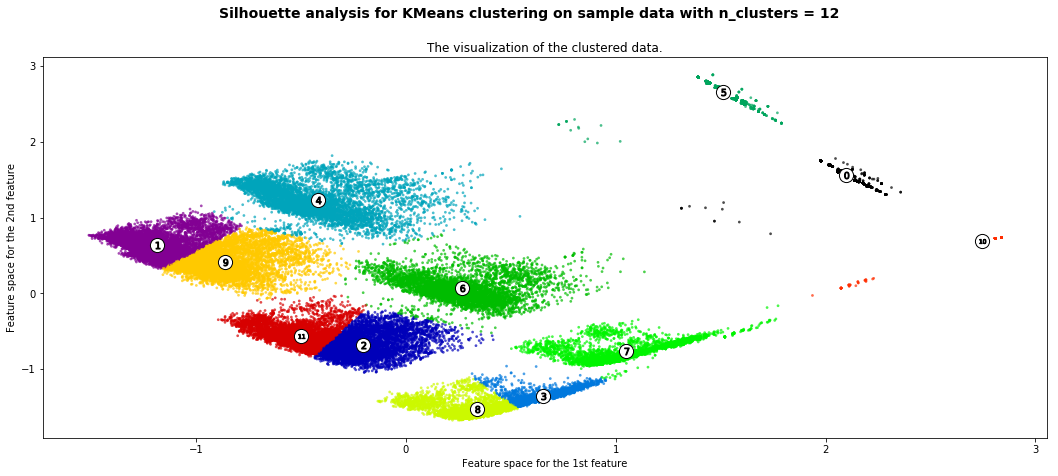

For n_clusters = 13 The average silhouette_score is : 0.4946556317183784


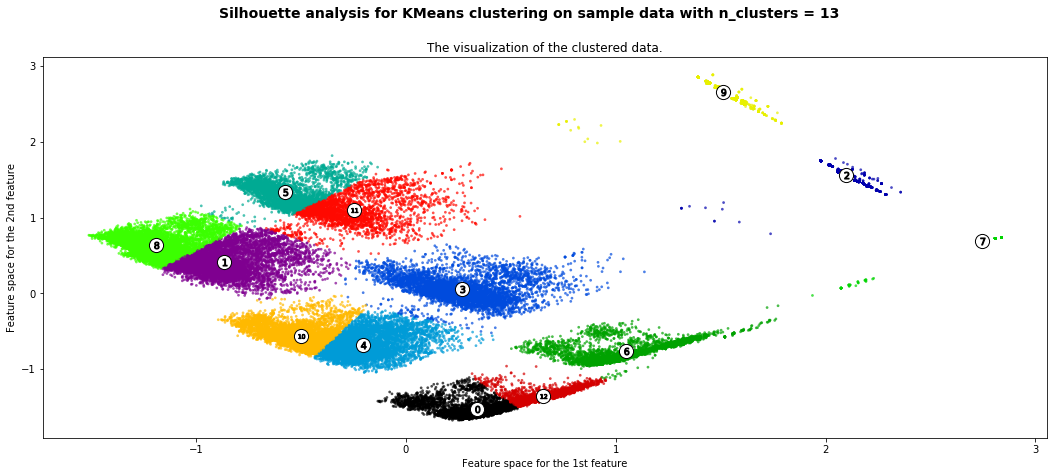

In [13]:
# Determine your k range

score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

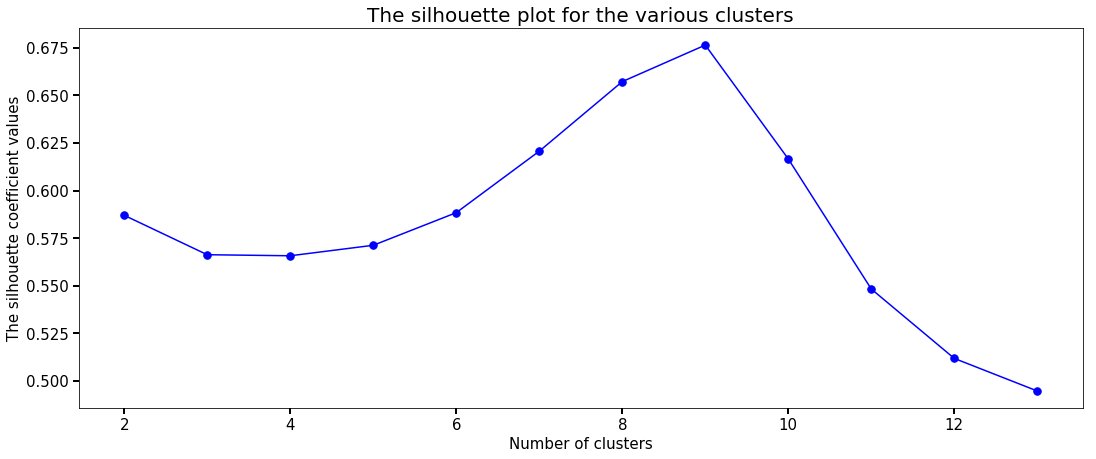

In [14]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')